# Metropolis algorithm

This notebook considers a rod-spring model for filament configurations. 

A filament of length $l$ is assumed to be made by $N$ identical rigid segments connected by $N-1$ torsion springs. Thus, the bending energy of the filament can be written as 

$$
U_{bend} = \sum_i \frac{1}{2} k_\theta (\Delta\theta)_i^2, 
$$

where $(\Delta\theta)_i$ is the angle between segments $i$ and $i+1$. We can derive an analytical expression for the continuum bending rigidity, $\kappa$, of the filament.

As a continuum, the bending energy of the filament can be written as

$$
U_{bend} = \int_0^l u(x)dx = \int_0^l \frac{1}{2} \kappa c^2 dx,
$$

where $c$ is the local curvature at $x$. Assuming a small angle $(\Delta\theta)_i$, we have from geometrical relation that $R(\Delta\theta)_i=l/N$, where $R$ is the local radius of curvature. This is followed by 

$$
c_i = \frac{N(\Delta\theta)_i}{l},
$$

where $c_i$ is the local curvature. The bending energy in the filament can then be approximated as

$$
U_{bend} \approx \sum_i \frac{1}{2}\kappa c_i^2 (l/N) = \sum_i \frac{1}{2}\kappa \left(\frac{N(\Delta\theta)_i}{l}\right)^2 (l/N) = \sum_i \frac{1}{2}\kappa \frac{N}{l} (\Delta\theta)_i^2.
$$

Compare this with the discrete bending energy, we get

$$
k_\theta = \frac{\kappa N}{l}.
$$

Based on the result above, we perform a Metropolis algorithm to simulate the configurations of filaments with various persistence lengths $l_p$. The persistence length is defined as the length of a filament at which thermal fluctuations can bend the filament. Intuitively, longer filaments are easier to bend and shorter filaments are harder. This intuition can be formalized by computing the bending energy of a circle:

$$
\frac{U_{bend}}{k_BT} = \frac{1}{2} \kappa \left( \frac{2\pi}{l} \right)^2 \frac{l}{k_BT} = 2\pi^2\frac{\kappa/k_BT}{l}.
$$

We notice that $\kappa/k_BT$ is a length determined by the bending rigidity $\kappa$. The ratio between $\kappa/k_BT$ and $l$ dictates the relative importance of $U_{bend}$ and thermal fluctuations. $l_p=\kappa/k_BT$ is defined as the persistence length. 

The bending energy of the filament can be expressed as the following:

$$
F(\Delta \theta_i) = \frac{1}{2} Nk_BT \left(\frac{l_p}{l}\right) \sum_{i=1}^{N-1} (\Delta \theta_i)^2
$$

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def bending_energy(theta, length_ratio, N):
    """
    Calculate the bending energy of a beam with a given angle of deflection.

    Parameters:
    theta (float): The angle of deflection in radians.
    length_ratio (float): The ratio of the length of the beam to the length of the cantilever.

    Returns:
    float: The bending energy of the beam.
    """
    return 0.5 * N * 1.38e-23 * 298 * length_ratio * (theta**2).sum()

In [36]:
def update_theta(theta):
    """
    Randomly change one of the angles.
    """
    new_theta = theta.copy()
    # Select a random index
    random_index = int(np.random.rand()*(len(new_theta) - 1))

    # Generate a new random number (for example, between 1 and 100)
    new_random_number = (np.random.rand() - 0.5) * np.pi

    new_theta[random_index] = new_random_number

    return new_theta

In [37]:
def visualize_filament(theta, N):
    length = 1 / N
    x = 0
    y = 0
    x_coords = [x]
    y_coords = [y]
    angle = 0
    for dangle in theta:
        angle += dangle
        x += length * np.cos(angle)
        y += length * np.sin(angle)
        x_coords.append(x)
        y_coords.append(y)
    
    plt.plot(x_coords, y_coords)

In [38]:
# initial condition
N = 100
theta = np.random.rand(N-1)
length_ratio = 1e-8

for i in range(N**2):
    new_theta = update_theta(theta)
    alpha = np.random.rand()
    determinator = np.exp((- bending_energy(new_theta, length_ratio, N) + bending_energy(theta, length_ratio, N))/1.38e-23/298)
    # print(f"{alpha:.2f}, {determinator:.2f}")
    if alpha < determinator:
        theta = new_theta
    else:
        pass

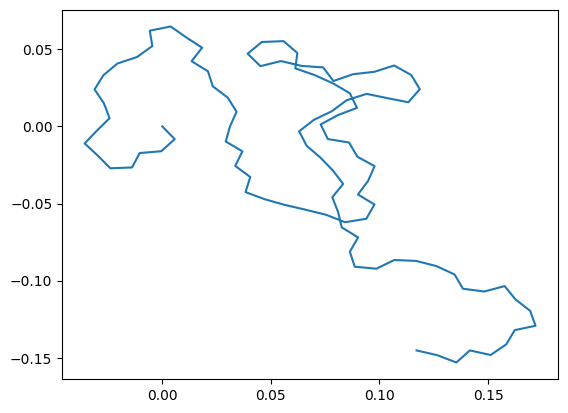

In [39]:
visualize_filament(theta, N)

[]

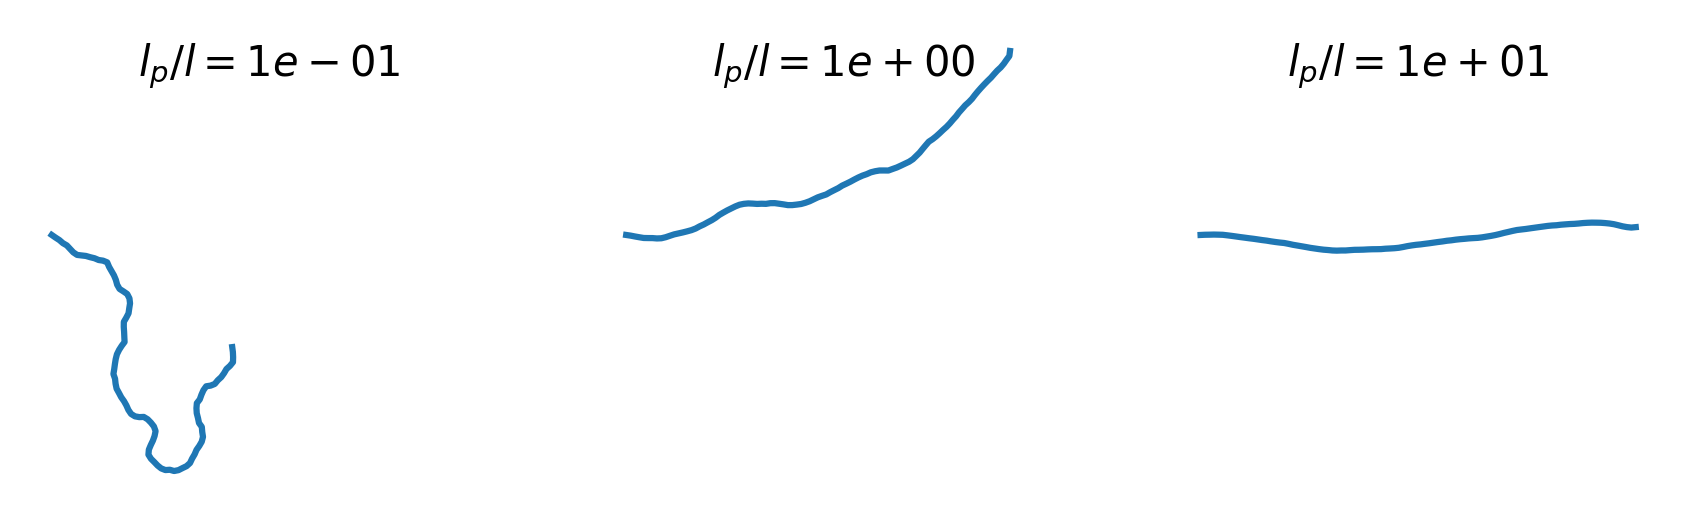

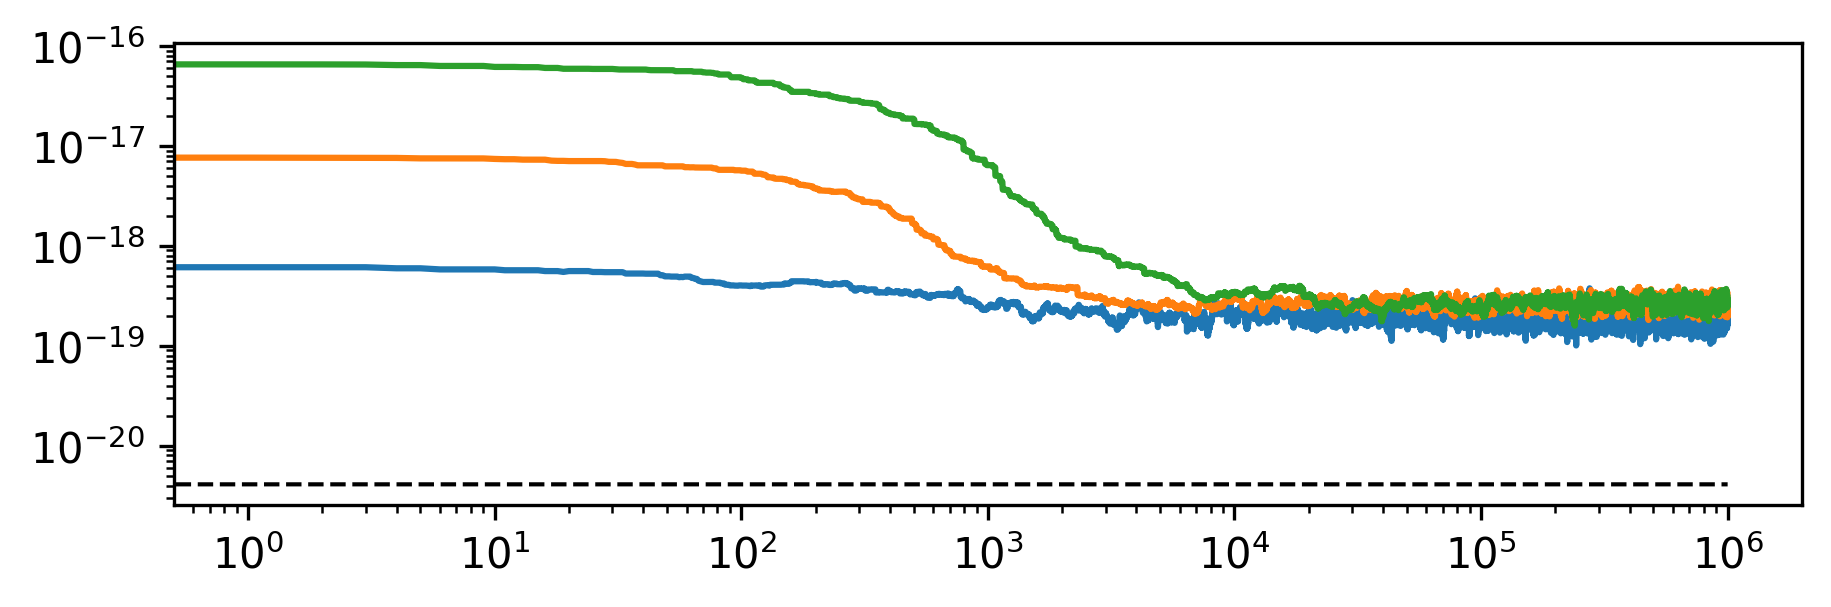

In [45]:
# draw 3 filaments with length_ratio in [1e-4, 1, 1e4]
length_ratios = [1e-1, 1e-0, 1e1]

N = 100
Nstep = 1000000
theta = np.random.rand(N-1)

count = 1
plt.subplots(nrows=1, ncols=3, figsize=(7, 2), sharex=True, sharey=True, dpi=300)
es = []
for length_ratio in length_ratios:
    e_list = []
    theta = np.random.rand(N-1)
    e_old = bending_energy(theta, length_ratio, N)
    for i in range(Nstep):
        new_theta = update_theta(theta)
        e_new = bending_energy(new_theta, length_ratio, N)
        e_list.append(e_old)
        alpha = np.random.rand()
        determinator = np.exp((- e_new + e_old)/1.38e-23/298)
        # print(f"{alpha:.2f}, {determinator:.2f}")
        if alpha < determinator:
            theta = new_theta
            e_old = e_new
        else:
            continue
    plt.subplot(1, 3, count)
    visualize_filament(theta, N)
    plt.annotate(f"$l_p/l={length_ratio:.0e}$", xy=(0.5, 0.9), xycoords="axes fraction", ha="center")
    plt.axis("off")
    count += 1
    es.append(e_list)

fig, ax = plt.subplots(figsize=(7, 2), dpi=300)
count = 0
for e in es:
    ax.plot(range(Nstep), e)
ax.plot(range(Nstep), np.ones(Nstep)*1.38e-23*298, label="$k_BT$", lw="1", ls="--", color="black")
ax.loglog()